# IAPR: Project ‒  Coin Counter


**Group ID:** 12

**Author 1 (sciper):** Vray Alexandre (310104)   
**Author 2 (sciper):** Aellen Edgar (311574)  
**Author 3 (sciper):** Robrdet Alexis (371391)   

**Release date:** 26.04.2024  
**Due date:** 29.05.2024 (11:59 pm)

In [1]:
import cv2
import os

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

from utils.display import plot_images

data_folder = 'data/train'

## Read data

In [2]:
data = pd.read_csv('data/train_labels.csv').sort_values(by='id')
data

,id,5CHF,2CHF,1CHF,0.5CHF,0.2CHF,0.1CHF,0.05CHF,2EUR,1EUR,0.5EUR,0.2EUR,0.1EUR,0.05EUR,0.02EUR,0.01EUR,OOD
6,L1010277,1,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0
10,L1010279,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
0,L1010281,0,0,0,0,2,3,1,0,0,0,0,0,2,0,0,0
15,L1010283,0,0,0,1,0,0,0,1,0,2,1,0,1,0,0,0
8,L1010287,0,1,1,0,0,0,1,0,0,0,0,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,L1010515,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
74,L1010517,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
78,L1010521,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
80,L1010523,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [3]:
def load_images_from_folder(folder):
    images = []
    for root, _, filenames in sorted(os.walk(folder)):
        for filename in sorted(filenames):
            img = cv2.imread(os.path.join(root, filename))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
    return images

# Replace 'path_to_your_folder' with the path to the folder containing your images
x = load_images_from_folder(data_folder)
y = data.loc[:,'5CHF':].values

labels = data.loc[:,'5CHF':].columns

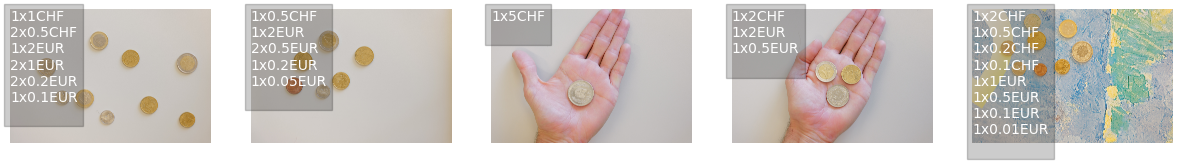

In [4]:
random.seed(42)
sample = random.sample(range(len(x)), k=5)

x_sample = [x[i] for i in sample]
y_sample = y[sample]
del x
del y

plot_images(images=x_sample, coins=y_sample, n_cols=5)

## 1. Localization

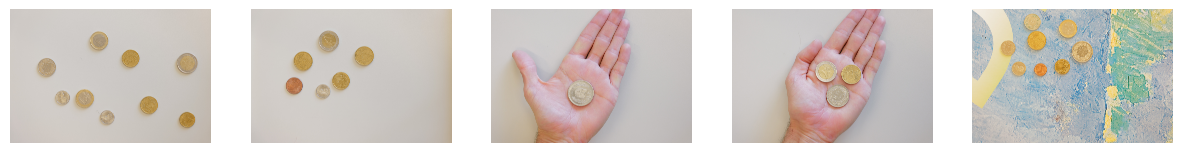

In [45]:
x_test = [x_sample[i] for i in [0,1,2,3,4]]
y_test = y_sample[[0,1,2,3,4]]

plot_images(images=x_test, n_cols=5)

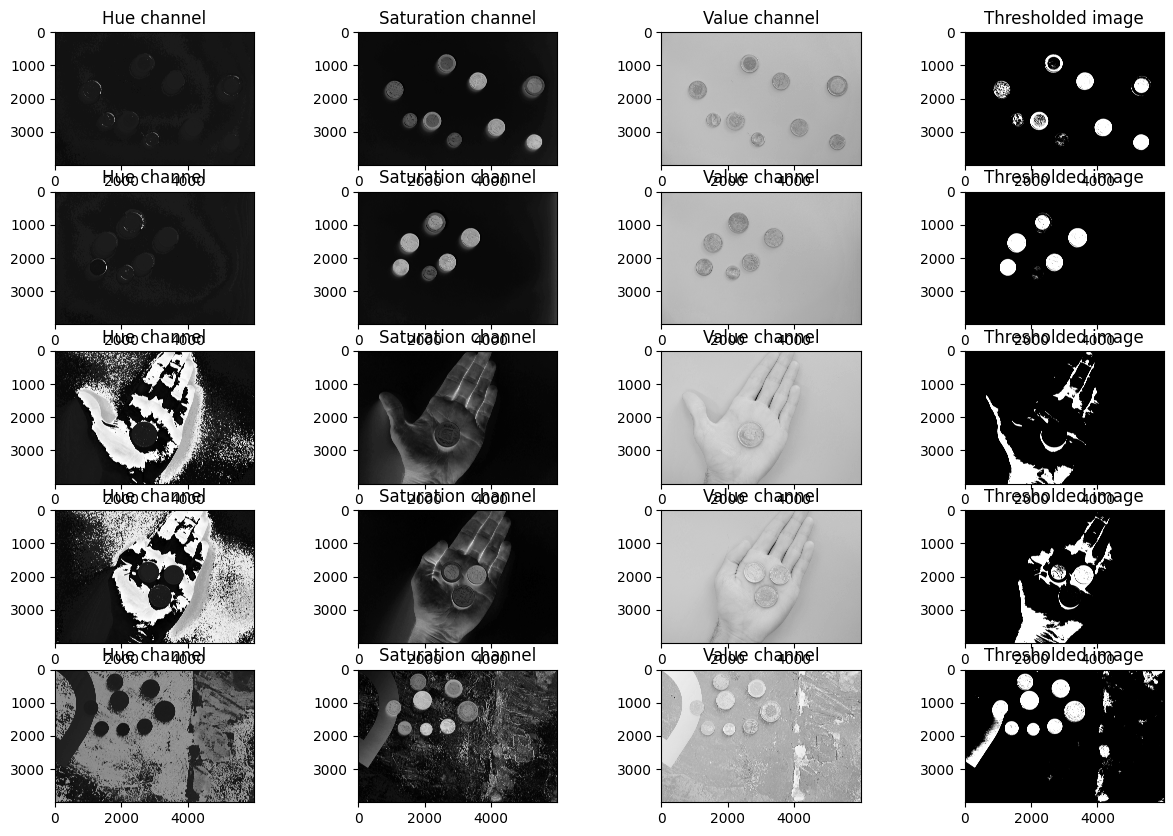

In [55]:
_, axs = plt.subplots(len(x_test), 4, figsize=(15,10))

for i in range(len(x_test)):
    hsv_img = cv2.cvtColor(x_test[i], cv2.COLOR_RGB2HSV)
    hue = hsv_img[:,:,0]
    saturation = hsv_img[:,:,1]
    value = hsv_img[:,:,2]

    img_th = (hue<30)&(saturation>80)

    axs[i,0].imshow(hue, cmap='gray')
    axs[i,0].set_title('Hue channel')
    axs[i,1].imshow(saturation, cmap='gray')
    axs[i,1].set_title('Saturation channel')
    axs[i,2].imshow(value, cmap='gray')
    axs[i,2].set_title('Value channel')
    axs[i,3].imshow(img_th, cmap='gray')
    axs[i,3].set_title('Thresholded image')


## 2. Feature extraction

## 3. Classification